<b> Load the required packages </b>

1. Pandas and NumPy for handling data
2. SciPy for statistical operations
3. Seaborn and Matplotlib for data visualization

In [137]:
import pandas as pd
import numpy as np
import scipy as stats
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statistics

<b> Load the dataset </b>

In [138]:
df = pd.read_csv('candy-data.csv')


<b> About the dataset: </b>

1. chocolate | Does it contain chocolate?
2. fruity | Is it fruit flavored?
3. caramel | Is there caramel in the candy?
4. peanutalmondy | Does it contain peanuts, peanut butter or almonds?
5. nougat | Does it contain nougat?
6. crispedricewafer | Does it contain crisped rice, wafers, or a cookie component?
7. hard | Is it a hard candy?
8. bar | Is it a candy bar?
9. pluribus | Is it one of many candies in a bag or box?
10. sugarpercent | The percentile of sugar it falls under within the data set.
11. pricepercent | The unit price percentile compared to the rest of the set.
12. winpercent | The overall win percentage according to 269,000 matchups.

For binary variables, 1 means yes, 0 means no.

In [139]:
# Creating a list of characteristics -- ingredient columns names
characteristics = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']
y = 'winpercent'

<b> Explore the dataset </b>

1. Shape of the dataset
2. First and last few rows of the dataset
3. Datatypes of the variables
4. Check for missing/null values

In [140]:
# Print the shape of the dataset
df.shape

(85, 13)

In [141]:
# Print the first 5 rows of the dataset
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [142]:
# Print the last 5 rows of the dataset
df.tail()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308
84,Whoppers,1,0,0,0,0,1,0,0,1,0.872,0.848,49.524113


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [144]:
# Check for null values in the df
df.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

<b> Observations: </b>

1. No missing values.
2. sugarpercent, pricepercent and winpercent are continuous variables.
3. The other features are binary categorical variables. [chocolate, fruity, caramel, peanutyalmondy, nougat, crispedricewafer, hard, bar and pluribus]
4. 'winpercent' is the target variable for the purpose of the analysis

<b> Statistical Analysis </b>

<b> Questions </b>

1. How many times does an ingredient appear in the 85 candies?
2. Which are the top 20 candies according to 'winpercent'?
3. Which are the bottom 20 candies according to the 'winpercent'?
4. How do the ingredients correlate with winpercent?

In [145]:
# How many times does an ingredient appear in the 85 candies?
df_characteristics = df[df.columns[1:-3]].agg(['sum'])

df_characteristics

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
sum,37,38,14,14,7,7,15,21,44


In [146]:
df[characteristics].sum().sort_values(ascending=False)

pluribus            44
fruity              38
chocolate           37
bar                 21
hard                15
peanutyalmondy      14
caramel             14
crispedricewafer     7
nougat               7
dtype: int64

Top 10 positive and negative correlations between all variables

In [147]:
corr_df = pd.DataFrame([(f1, f2, df.corr()[f1].loc[f2]) for (f1, f2) in itertools.combinations(df.columns[1:].sort_values(), 2)],
             columns=['variable1', 'variable2', 'corr']).sort_values('corr')
corr_df = corr_df.iloc[(-corr_df['corr'].abs()).argsort()].reset_index(drop=True)
corr_df[:10]

,variable1,variable2,corr
0,chocolate,fruity,-0.741721
1,chocolate,winpercent,0.636517
2,bar,chocolate,0.597421
3,bar,pluribus,-0.593409
4,bar,nougat,0.522976
5,bar,pricepercent,0.518407
6,bar,fruity,-0.515066
7,chocolate,pricepercent,0.504675
8,fruity,pricepercent,-0.430969
9,bar,winpercent,0.429929


How does winpercent correlate with sugarpercent and pricepercent?

In [148]:

corr_df = pd.DataFrame([(f1, f2, df.corr()[f1].loc[f2]) for (f1, f2) in itertools.combinations(df.columns[10:13].sort_values(), 2)],
             columns=['variable1', 'variable2', 'corr']).sort_values('corr')
corr_df = corr_df.iloc[(-corr_df['corr'].abs()).argsort()].reset_index(drop=True)
corr_df[:]

,variable1,variable2,corr
0,pricepercent,winpercent,0.345325
1,pricepercent,sugarpercent,0.329706
2,sugarpercent,winpercent,0.229151


Top 10 positive and negative correlations between the ingredients

In [149]:
corr_df = pd.DataFrame([(f1, f2, df.corr()[f1].loc[f2]) for (f1, f2) in itertools.combinations(df.columns[1:9].sort_values(), 2)],
             columns=['variable1', 'variable2', 'corr']).sort_values('corr')
corr_df = corr_df.iloc[(-corr_df['corr'].abs()).argsort()].reset_index(drop=True)
corr_df[:10]

,variable1,variable2,corr
0,chocolate,fruity,-0.741721
1,bar,chocolate,0.597421
2,bar,nougat,0.522976
3,bar,fruity,-0.515066
4,bar,crispedricewafer,0.423751
5,fruity,peanutyalmondy,-0.399280
6,fruity,hard,0.390678
7,chocolate,peanutyalmondy,0.377824
8,chocolate,hard,-0.344177
9,chocolate,crispedricewafer,0.341210


Which are the top 20 candies according to "winpercent"? <br>
Since chocolate shows the highest positive correlation with winpercent (target variable), we check which candies are in the top 20.

In [150]:

df.sort_values('winpercent', ascending=False)[:20]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
53,ReeseÕs pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
54,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
32,Peanut butter M&MÕs,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641


Which are the bottom 20 candies according to "winpercent"?

In [151]:

df.sort_values('winpercent', ascending=True)[:20]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
44,Nik L Nip,0,1,0,0,0,0,0,0,1,0.197,0.976,22.445341
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
12,Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325,24.524988
72,Super Bubble,0,1,0,0,0,0,0,0,0,0.162,0.116,27.303865
26,Jawbusters,0,1,0,0,0,0,1,0,1,0.093,0.511,28.127439
57,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.732,0.069,29.703691
71,Sugar Daddy,0,0,1,0,0,0,0,0,0,0.418,0.325,32.230995
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
70,Sugar Babies,0,0,1,0,0,0,0,0,1,0.965,0.767,33.437550
19,Haribo Happy Cola,0,0,0,0,0,0,0,0,1,0.465,0.465,34.158958


<b> Initial Obeservations: </b>
1. Chocolate, fruity and pluribus are the most commonly occurring characteristics. 
2. In the top 20 candies according to winpercent, chocolate appears to be the most appearing ingredient and appears in almost all candies except for 2.
3. In the bottom 20 candies, chocolate appears only 3 times. 
4. Chocolate and fruity flavour are highly negatively correlated i.e. the two ingredients almost certainly do not appear together in a candy.
5. Pluribus, although the highest occurring characteristics, does not seem to have a great effect on winpercent and appears in almost all bottom performing candies. 
6. None of the top 20 candies are hard and almsot none of the bottom 20 candies have the characetristic of crispedricewafer, nougat, bar


<b> Exploratory Data Analysis </b>

1. How do the different candies compare according to the contents?
2. Which candy is more likely to win a matchup against its competitors based on its contents?

<AxesSubplot:xlabel='winpercent', ylabel='competitorname'>

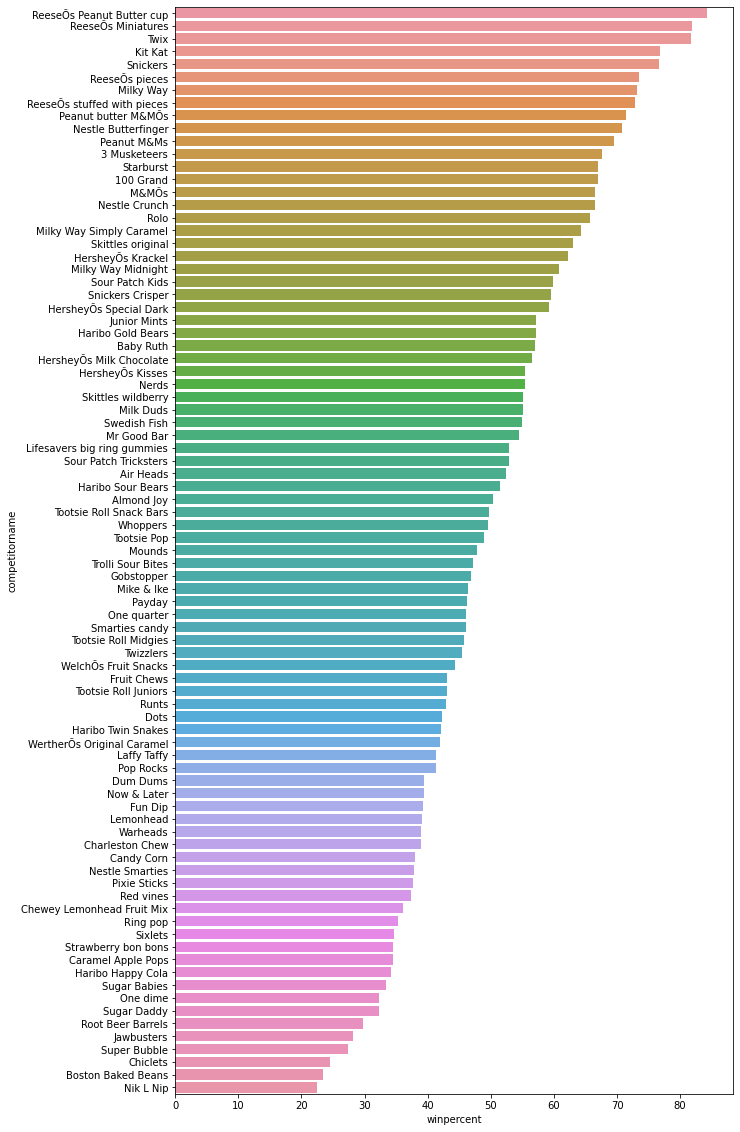

In [152]:
# To check if there are absolute out-and-out winners? 

plt.figure(figsize=(10,20))
sns.barplot(x = df['winpercent'], y = df['competitorname'], order = df.sort_values('winpercent',ascending = False).competitorname)

<b> Observations: </b> 
There are no outright winners or losers according to winpercent, however, a large number of the top 10 candies (6?) contain peanut/ peanut butter.

<b> Visualizing the following questions: </b>

1. How many candies contain chocolate?
2. How many candies are fruity?
3. How many candies have caramel?
4. How many candies contain peanutyalmondy?
5. How many candies contain nougat?
6. How many candies contain crispedricewafer
7. How many candies are hard?
8. How many candies are bars?
9. How many candies are pluribus (contained in multiple quantities in a packet)?

/Users/vednerlikar/opt/anaconda3/envs/prep_env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


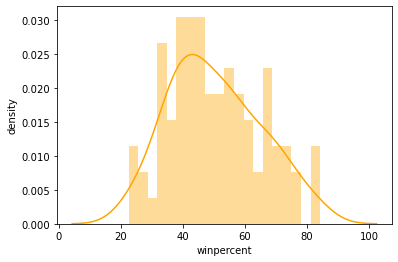

In [153]:
sns.distplot(df['winpercent'], color= 'orange', bins = 20)
plt.xlabel('winpercent')
plt.ylabel('density')
plt.show()

The distribution of the winpercent seems to be approximately normally distributed. 

Text(0.5, 1.0, 'pluribus')

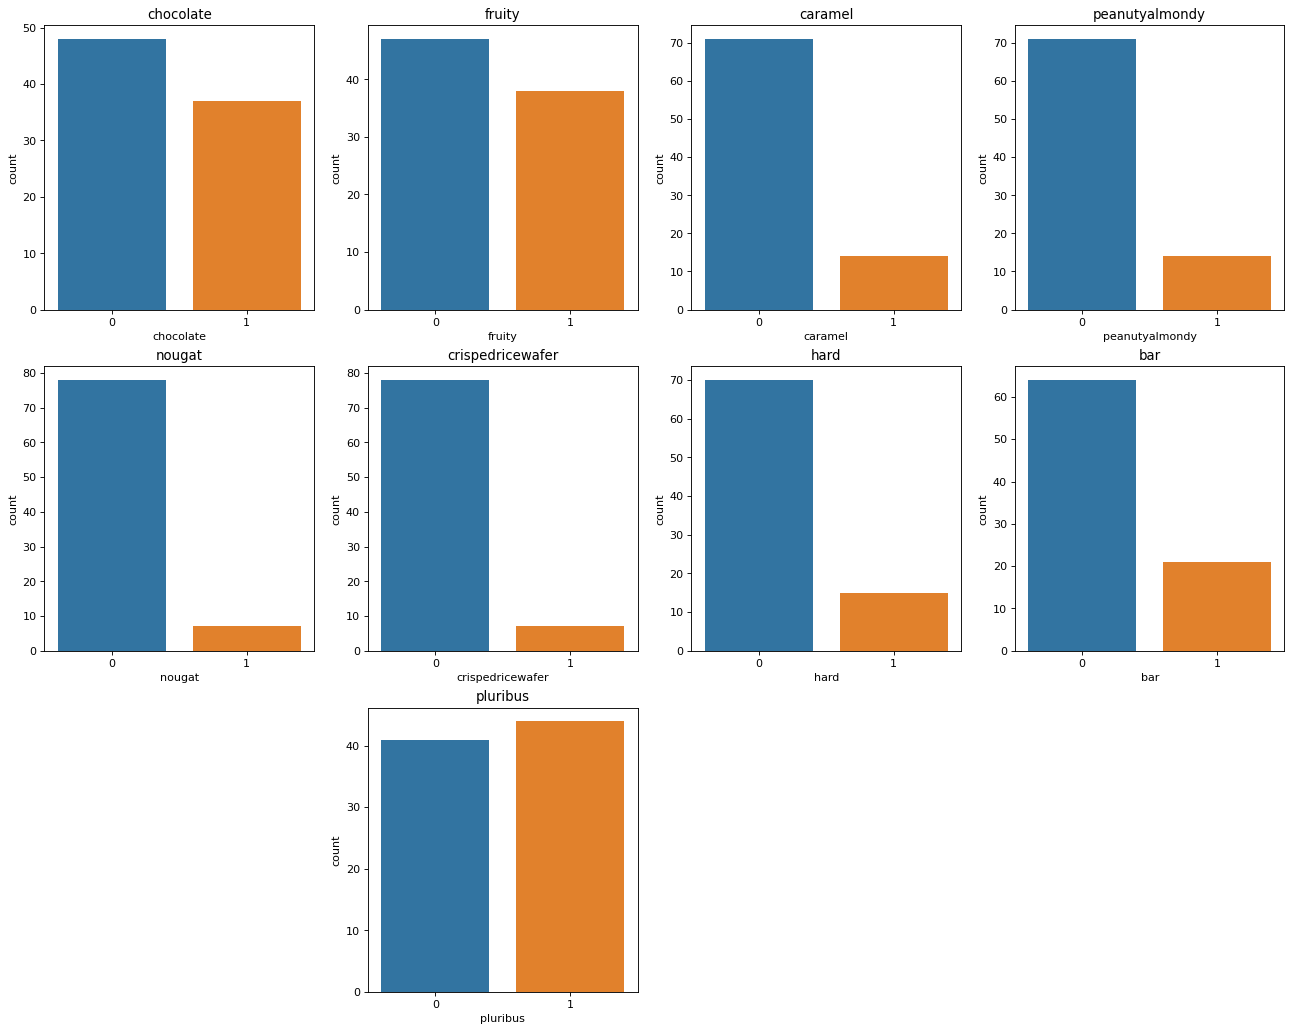

In [154]:
characteristics = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']

plt.figure(figsize = (20,16), dpi = 80)
plt.subplot(3,4,1)
sns.countplot(x='chocolate', data = df)
plt.title('chocolate')

plt.subplot(3,4,2)
sns.countplot(x='fruity', data = df)
plt.title('fruity')

plt.subplot(3,4,3)
sns.countplot(x='caramel', data = df)
plt.title('caramel')

plt.subplot(3,4,4)
sns.countplot(x='peanutyalmondy', data = df)
plt.title('peanutyalmondy')

plt.subplot(3,4,5)
sns.countplot(x='nougat', data = df)
plt.title('nougat')

plt.subplot(3,4,6)
sns.countplot(x='crispedricewafer', data = df)
plt.title('crispedricewafer')

plt.subplot(3,4,7)
sns.countplot(x='hard', data = df)
plt.title('hard')

plt.subplot(3,4,8)
sns.countplot(x='bar', data = df)
plt.title('bar')

plt.subplot(3,4,10)
sns.countplot(x='pluribus', data = df)
plt.title('pluribus')






In [155]:
d = df[df['winpercent'] > 65]

In [156]:
top_10_winners =  df.sort_values('winpercent', ascending=False)[:20]
sum_total_occurrence = top_10_winners.agg(['sum'])

In [157]:
sum_total_occurrence = sum_total_occurrence.drop(['competitorname'], axis = 1)

In [158]:
sum_total_occurrence

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
sum,18,2,6,8,3,5,0,10,7,12.0,12.887,1422.33557


[Text(0.5, 1.0, 'Relation between pricepercent and winpercent')]

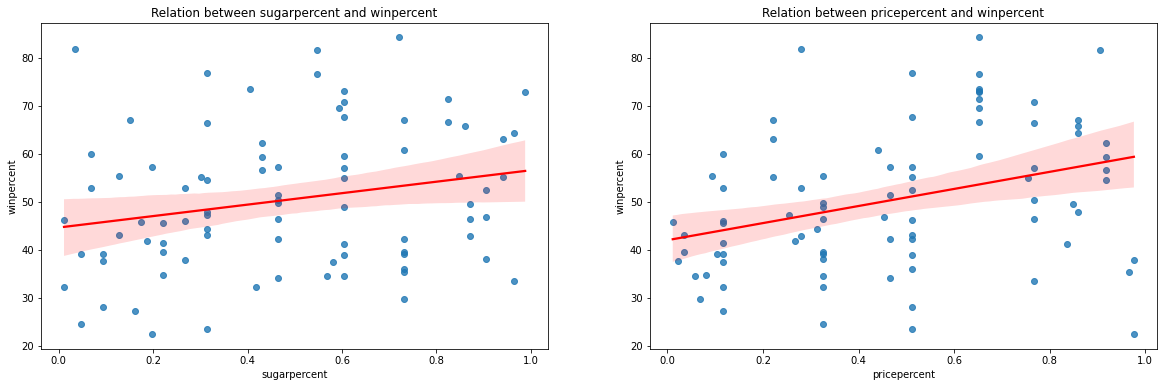

In [159]:
# relationship of winpercent with the other continour variables (sugarpercent and pricepercent) using regression plot

# x = df[['sugarpercent', 'pricepercent']]
# y = df['winpercent'] #target variable

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=df['sugarpercent'], y=df['winpercent'], ax=ax1, line_kws = {'color' :'red'})
ax1.set(title='Relation between sugarpercent and winpercent')
sns.regplot(x=df['pricepercent'], y=df['winpercent'], ax=ax2, line_kws = {'color' :'red'})
ax2.set(title='Relation between pricepercent and winpercent')




<b> Observations: </b>

1. Sugar content has only a slight positive correlation with winpercent indicating that the respondents did not seem to consider sugar content/ sweetness while picking a candy
2. Price has a slightly higher correlation with winpercent but it is not as statistically significant. 

Text(0.5, 1.0, 'pluribus')

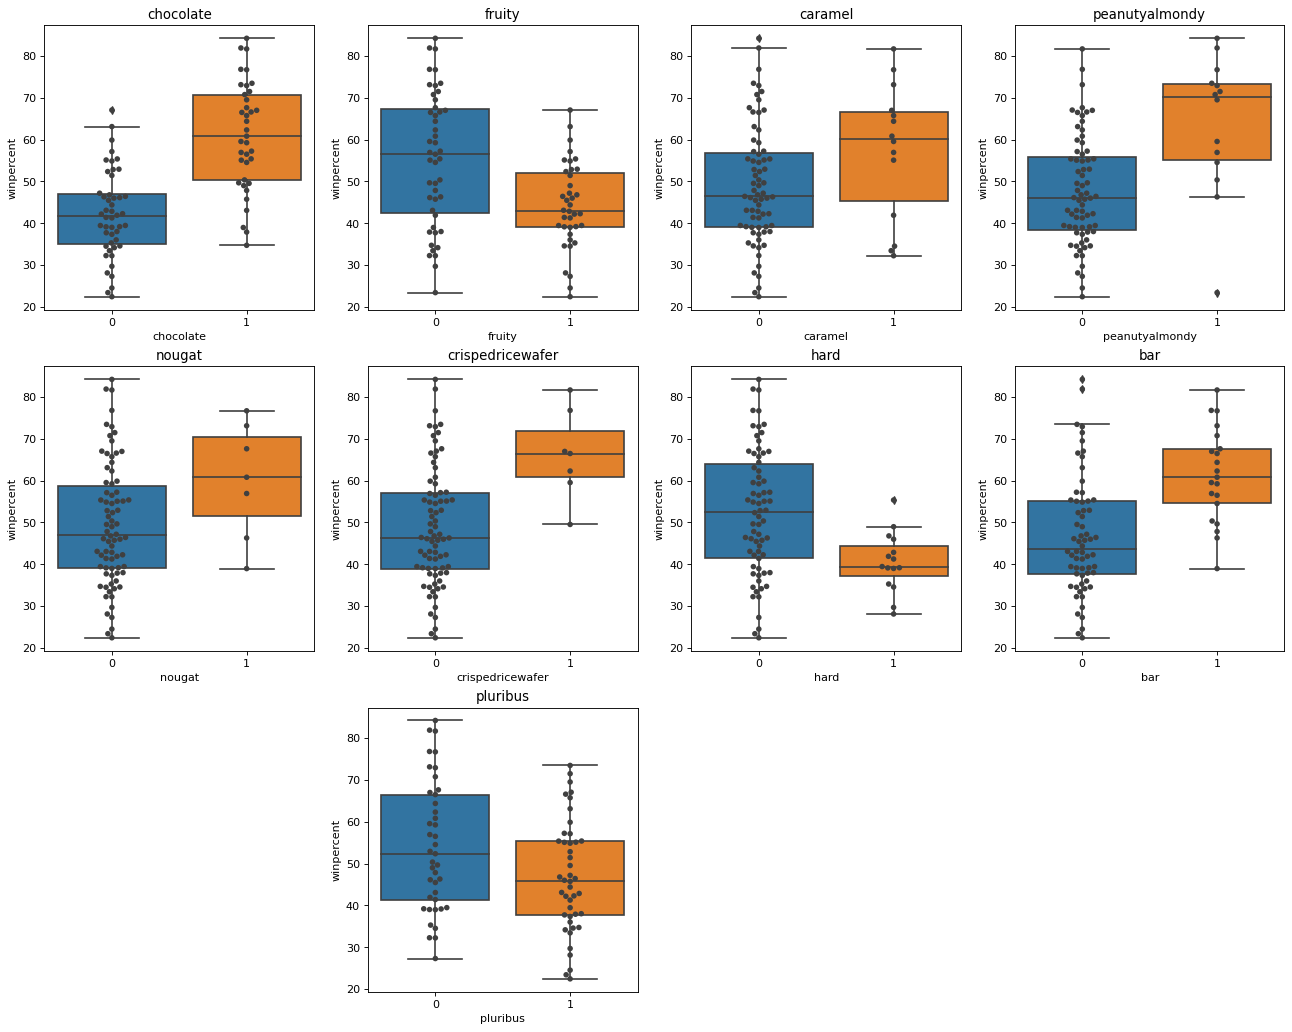

In [160]:
characteristics = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']
y = 'winpercent'

plt.figure(figsize = (20,16), dpi = 80)
plt.subplot(3,4,1)
sns.boxplot(x='chocolate', y = y, data = df)
sns.swarmplot(x='chocolate', y=y, data=df, color=".25")
plt.title('chocolate')

plt.subplot(3,4,2)
sns.boxplot(x='fruity', y = y,  data = df)
sns.swarmplot(x='fruity', y=y, data=df, color=".25")
plt.title('fruity')

plt.subplot(3,4,3)
sns.boxplot(x='caramel', y = y, data = df)
sns.swarmplot(x='caramel', y=y, data=df, color=".25")
plt.title('caramel')

plt.subplot(3,4,4)
sns.boxplot(x='peanutyalmondy', y = y, data = df)
sns.swarmplot(x='peanutyalmondy', y=y, data=df, color=".25")
plt.title('peanutyalmondy')

plt.subplot(3,4,5)
sns.boxplot(x='nougat', y = y,data = df)
sns.swarmplot(x='nougat', y=y, data=df, color=".25")
plt.title('nougat')

plt.subplot(3,4,6)
sns.boxplot(x='crispedricewafer',y = y, data = df)
sns.swarmplot(x='crispedricewafer', y=y, data=df, color=".25")
plt.title('crispedricewafer')

plt.subplot(3,4,7)
sns.boxplot(x='hard',y = y, data = df)
sns.swarmplot(x='hard', y=y, data=df, color=".25")
plt.title('hard')

plt.subplot(3,4,8)
sns.boxplot(x='bar',y = y, data = df)
sns.swarmplot(x='bar', y=y, data=df, color=".25")
plt.title('bar')

plt.subplot(3,4,10)
sns.boxplot(x='pluribus',y = y, data = df)
sns.swarmplot(x='pluribus', y=y, data=df, color=".25")
plt.title('pluribus')


<b> Observations </b>

1. Chocolate is the obvious distinguishing factor in winning candies
2. Bar, nougat, crispedricewafer, caramel, peanutyalmondy are also statistically signficant characteristics when compared to the winpercent

<b> Since chocolate and bar are the must have characteristics for a top 20 candy, does it make a difference if the chocolate has other ingredients mixed in it? </b>

In [161]:
# How does chocolate perform when it is the only ingredient in a bar vs. when mixed with other ingredients?
pure_choc_bar = df[(df["chocolate"] == 1) & (df["bar"] == 1) & (df["caramel"] == 0) & 
     (df["peanutyalmondy"] == 0) & (df["nougat"] == 1) & (df["crispedricewafer"] == 0)]

mixed_bar = df[(df["chocolate"] == 1) & (df["bar"] == 1) & ((df["caramel"] == 1) | 
     (df["peanutyalmondy"] == 1) | (df["nougat"] == 1) | (df["crispedricewafer"] == 1))]

In [162]:
pure_choc_bar

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
10,Charleston Chew,1,0,0,0,1,0,0,1,0,0.604,0.511,38.975037


In [163]:
pure_choc_bar

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
10,Charleston Chew,1,0,0,0,1,0,0,1,0,0.604,0.511,38.975037


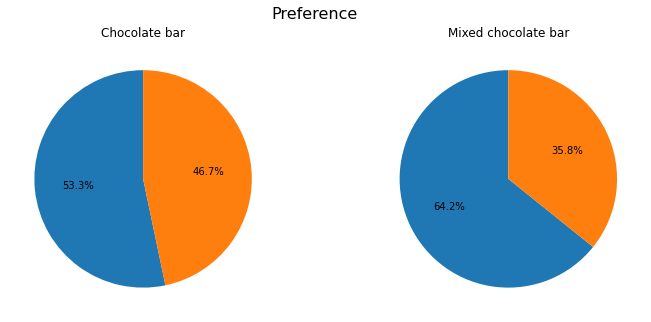

In [164]:
# pure chocolate bar vs chocolate + other ingredients

pure_choc_bar_percent = round(np.sum(pure_choc_bar["winpercent"])/len(pure_choc_bar), 2)
mixed_bar_percent = round(np.sum(mixed_bar["winpercent"])/len(mixed_bar), 2)


# pie charts (graphics)
y_pure = np.array([pure_choc_bar_percent, 100-pure_choc_bar_percent])
y_unpure = np.array([mixed_bar_percent, 100-mixed_bar_percent])



fig = plt.figure(figsize=(12,5))
fig.suptitle('Preference', fontsize=16)
plt.subplot(1, 2, 1)

plt.title('Chocolate bar')
plt.pie(y_pure, startangle = 90, autopct='%1.1f%%')


plt.subplot(1, 2, 2)
plt.title('Mixed chocolate bar')
plt.pie(y_unpure, startangle = 90, autopct='%1.1f%%')
plt.show() 

The mixed chocolate bar i.e. other ingredients added to the chocolate bar has an advantage over a chocolate bar with no other added ingredients.

<b> Final Observations </b>

1. Chocolate therefore is a must have for the new candy
2. The bar characteristic of candies is more preferrable than pluribus, therefore the candy should preferably a bar
3. It is advantageous for the chocolate bar to have ingredients mixed and we identify these ingredients in the modelling phase